In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("AnimeWorld.csv")

In [3]:
data.sample(10)

,Unnamed: 0,Anime,Genre,Description,Studio,Year,Rating
379,4,Isekai Maou to Shoukan Shoujo no Dorei Majutsu,"['Comedy', 'Fantasy', 'Ecchi']",When it comes to the fantasy MMORPG Cross Reve...,Ajia-Do,"Jul 5, 2018",NaN
504,17,Urara Meirochou,"['Comedy', 'Fantasy', 'Slice of Life']",Labyrinth Town is a legendary city composed of...,J.C.Staff,"Jan 6, 2017",NaN
296,33,Bakumatsu: Crisis,Action,The Bakumatsu was an era in which the souls of...,Studio Deen,"Apr 5, 2019",NaN
673,10,Akagami no Shirayuki-hime 2nd Season,"['Drama', 'Fantasy', 'Romance']",Shirayuki and Zen Wistalia have finally confir...,Bones,"Jan 12, 2016",NaN
214,74,Asa Da yo! Kaishain,Comedy,The series follows a variety of employed shell...,DLE,"Apr 4, 2016",NaN
113,19,Pet,"['Mystery', 'Supernatural']","Despite endless research, the human mind remai...",Geno Studio,"Jan 6, 2020",NaN
69,5,Otome Game no Hametsu Flag shika Nai Akuyaku R...,"['Comedy', 'Drama', 'Fantasy', 'Romance']",Most people would prefer being the protagonist...,SILVER LINK.,"Apr 5, 2020",NaN
116,22,Majutsushi Orphen Hagure Tabi,"['Action', 'Adventure', 'Drama', 'Fantasy']","In a world of magic and monsters, Krylancelo F...",Studio Deen,"Jan 7, 2020",NaN
641,26,Seikaisuru Kado,Sci-Fi,"Cool-headed and rational, Koujirou Shindou is ...",Toei Animation,"Apr 7, 2017",NaN
697,34,Mahou Shoujo Nante Mou Ii Desukara.,Comedy,"Yuzuka Hanami is a young, carefree girl who li...",Pine Jam,"Jan 12, 2016",NaN


In [4]:
anime_data = data[['Anime','Genre','Description','Studio']]

In [5]:
anime_data.sample(5)

,Anime,Genre,Description,Studio
858,Binan Koukou Chikyuu Boueibu LOVE!,"['Comedy', 'Slice of Life']",Why should girls get to have all the fun? Thes...,Diomedéa
54,Kiratto Pri☆chan Season 3,Comedy,Third season of Kiratto Pri☆chan.,Tatsunoko Production
467,Fumikiri Jikan,"['Comedy', 'Slice of Life']","Every day, all kinds of different people stop ...",EKACHI EPILKA
304,Overlord II,"['Action', 'Adventure', 'Fantasy', 'Supernatur...","Ainz Ooal Gown, the undead sorcerer formerly k...",Madhouse
485,Chao Zhi Neng Zu Qiu 2: Shijie Dasai Pian,Sports,(No synopsis yet.),Team Sports


<AxesSubplot:>

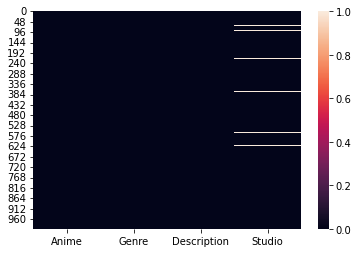

In [6]:
sns.heatmap(anime_data.isnull())

In [7]:
for col in anime_data.columns:
    empty = anime_data[col].isnull().sum()
    percent = empty/len(anime_data)*100
    print(f"{col}:{percent}% empty data")

Anime:0.0% empty data
Genre:0.0% empty data
Description:0.0% empty data
Studio:2.7860696517412937% empty data


In [8]:
anime_data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Anime        1005 non-null   object
 1   Genre        1005 non-null   object
 2   Description  1005 non-null   object
 3   Studio       977 non-null    object
dtypes: object(4)
memory usage: 31.5+ KB


In [9]:
def WC_generate(col,size,words):
    plt.figure(figsize=(15,15))
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = size,  height = size, max_words = words)
    wordcloud.generate(' '.join(anime_data[col].astype(str)))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f"{col} Wordcloud",fontsize = 24)
    plt.show()

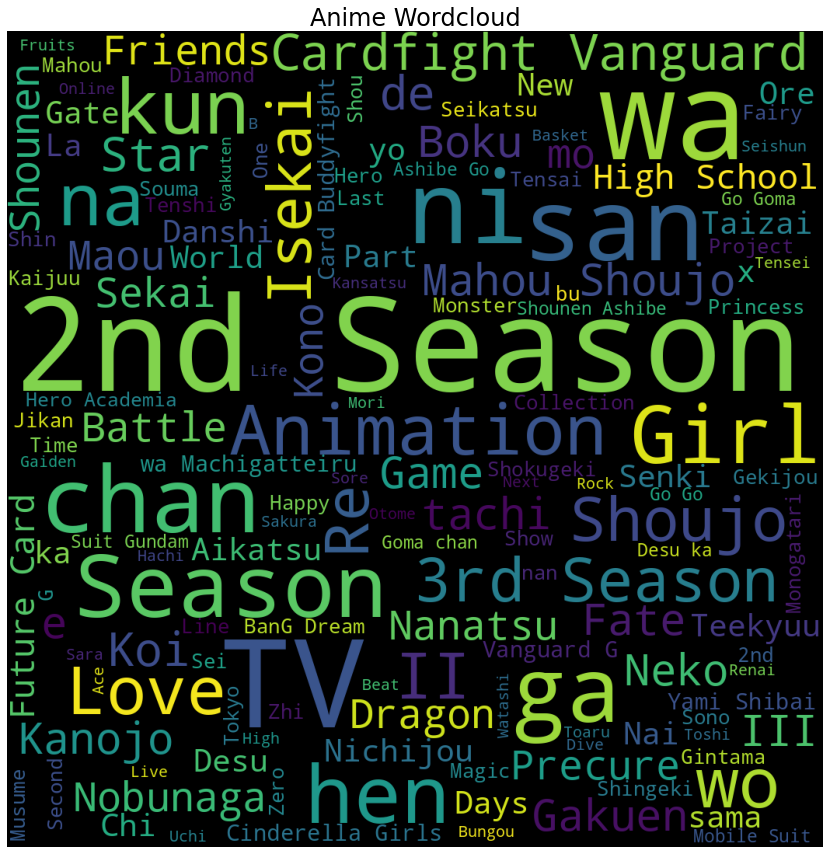

In [10]:
WC_generate('Anime',1050,150)

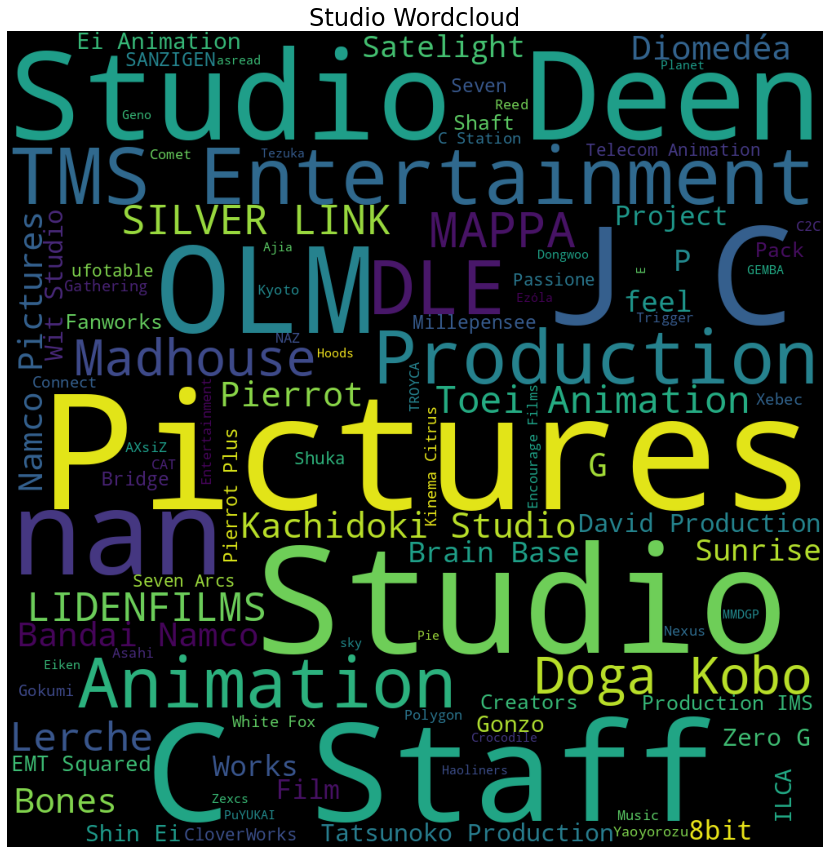

In [11]:
WC_generate('Studio',1000,100)

In [12]:
def filter_genre(data):
    if data[0]=='[':
        return data.strip('[]').replace(' ','').replace("'",'')
    else:
        return data

In [13]:
anime_data['Genre'] = anime_data['Genre'].apply(filter_genre)

In [14]:
anime_data['Genre']

0                   Drama,Fantasy,Suspense
1                           Comedy,Romance
2       Action,Fantasy,Sci-Fi,Supernatural
3                           Action,Fantasy
4                      Action,Supernatural
                       ...                
1000                    Comedy,SliceofLife
1001                    Comedy,SliceofLife
1002                         Slice of Life
1003                                Comedy
1004                                Comedy
Name: Genre, Length: 1005, dtype: object

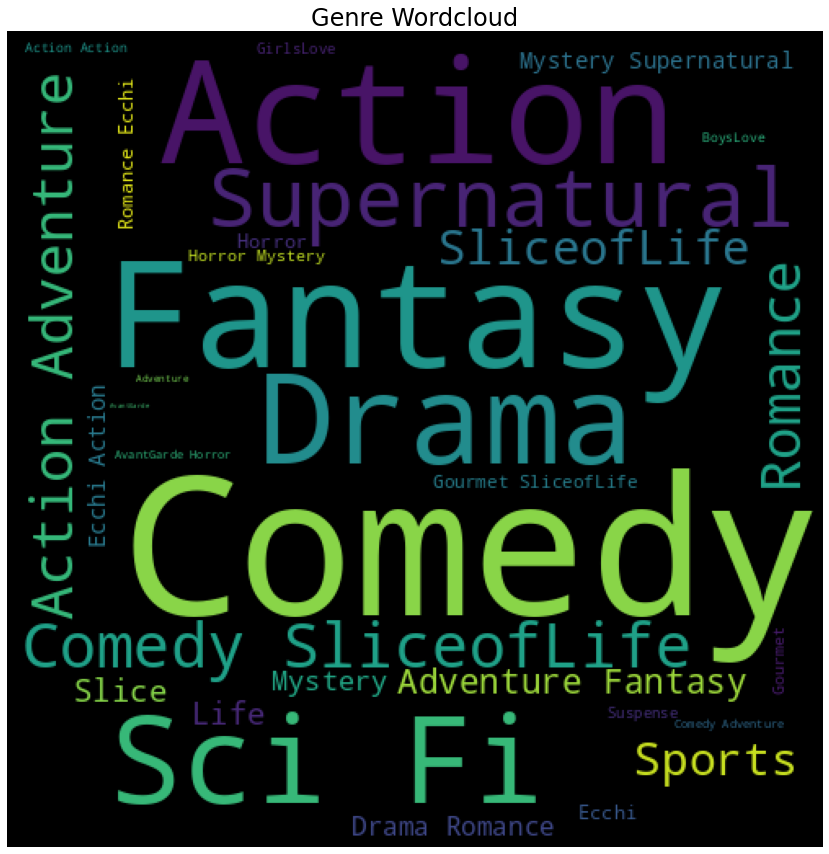

In [15]:
WC_generate('Genre',500,50)

In [16]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(anime_data['Genre'])

In [33]:
TfidfVectorizer?

In [38]:
tfidf.get_feature_names_out()

array(['action', 'adventure', 'avantgarde', 'boyslove', 'comedy', 'drama',
       'ecchi', 'fantasy', 'fi', 'girlslove', 'gourmet', 'horror', 'life',
       'mystery', 'romance', 'sci', 'slice', 'sliceoflife', 'sports',
       'supernatural', 'suspense'], dtype=object)

In [40]:
len(tfidf.get_feature_names_out())

21

This is very weird we are getting, Sci-Fi as two different terms. We shall fix this. And what on earth is avantgarde?

In [39]:
tfidf_matrix.shape

(1005, 21)

In [18]:
tfidf_matrix

<1005x21 sparse matrix of type '<class 'numpy.float64'>'
	with 2344 stored elements in Compressed Sparse Row format>

In [24]:
for i in tfidf_matrix:
    print(i)

  (0, 20)	0.8376694945052975
  (0, 7)	0.3571460419854311
  (0, 5)	0.4132269626602071
  (0, 14)	0.863360725758711
  (0, 4)	0.5045872146788819
  (0, 19)	0.47949435191338435
  (0, 8)	0.4967595663645076
  (0, 15)	0.4967595663645076
  (0, 0)	0.35236325334740703
  (0, 7)	0.3903654321584934
  (0, 0)	0.6700507226613428
  (0, 7)	0.74231531646667
  (0, 19)	0.8058163046041696
  (0, 0)	0.5921655876814189
  (0, 14)	0.863360725758711
  (0, 4)	0.5045872146788819
  (0, 13)	0.7129625967494149
  (0, 1)	0.5593278942548685
  (0, 0)	0.42289081610357254
  (0, 1)	0.663251038773068
  (0, 0)	0.5014639461919587
  (0, 7)	0.5555465509172339
  (0, 6)	0.907789376583686
  (0, 4)	0.41942633174587757
  (0, 1)	0.5100489831623579
  (0, 8)	0.5436623892097383
  (0, 15)	0.5436623892097383
  (0, 0)	0.38563252960890465
  (0, 6)	0.6683752427166747
  (0, 14)	0.5283807628171763
  (0, 4)	0.3088097123777835
  (0, 7)	0.42275863793578017
  (0, 6)	0.7872430181768124
  (0, 4)	0.36373024384694863
  (0, 7)	0.49794451502441733
  (0, 6)	

In [59]:
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
index_sim = pd.Series(anime_data.index, index=anime_data['Anime']).drop_duplicates()

In [61]:
cosine_sim.shape

(1005, 1005)

In [62]:
cosine_sim

array([[1.        , 0.        , 0.13941747, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.50458721,
        0.50458721],
       [0.13941747, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.50458721, 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.50458721, 0.        , ..., 0.        , 1.        ,
        1.        ]])

In [63]:
index_sim.shape

(1005,)

In [64]:
index_sim

Anime
Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season                                                                0
Kanojo, Okarishimasu                                                                                            1
The God of High School                                                                                          2
Maou Gakuin no Futekigousha: Shijou Saikyou no Maou no Shiso, Tensei shite Shison-tachi no Gakkou e Kayou       3
Enen no Shouboutai: Ni no Shou                                                                                  4
                                                                                                             ... 
Urawa no Usagi-chan                                                                                          1000
Takamiya Nasuno Desu!: Teekyuu Spin-off                                                                      1001
Tesagure! Bukatsumono Spin-off Purupurun Sharumu to Asobou                        

In [79]:
def get_recommendations(title):
    idx = index_sim[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    print(sim_scores[1000])
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    print(sim_scores,'\n')
    movie_indices = [i[0] for i in sim_scores]
    return anime_data['Anime'].iloc[movie_indices]

In [81]:
get_recommendations('Urawa no Usagi-chan')

1000
(1000, 1.0)
[(23, 1.0), (39, 1.0), (46, 1.0), (47, 1.0), (48, 1.0), (52, 1.0), (57, 1.0), (65, 1.0), (71, 1.0), (109, 1.0)] 



23                Hulaing Babies Aratame: Staying Babies
39                                       Gal to Kyouryuu
46                                             Sazae-san
47                              Chibi Maruko-chan (1995)
48                                               Rebirth
52                                    Bonobono (TV 2016)
57     Kamiusagi Rope: Warau Asa ni wa Fukuraitaru tt...
65                                Ma-eum-uisoli Season 2
71                                      Kakushigoto (TV)
109                                             Nekopara
Name: Anime, dtype: object